In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


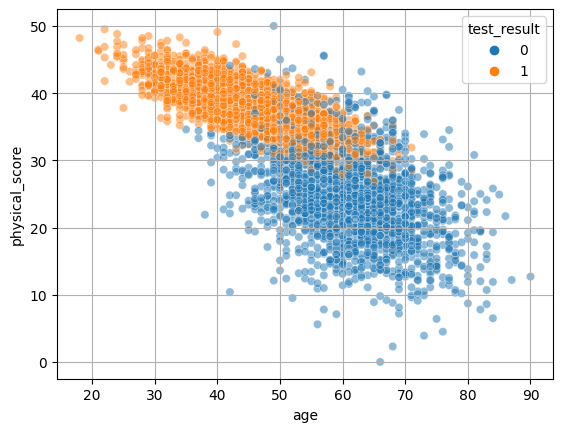

In [5]:
sns.scatterplot(data = df , x = 'age' , y = 'physical_score' , hue = 'test_result', alpha=0.5)
plt.grid()

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

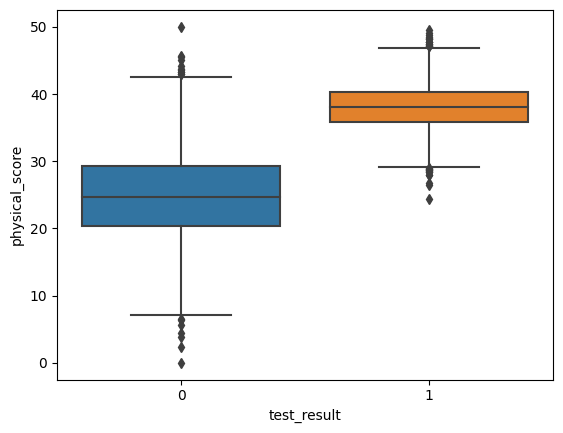

In [6]:
sns.boxplot(df['test_result'] , df['physical_score'] )

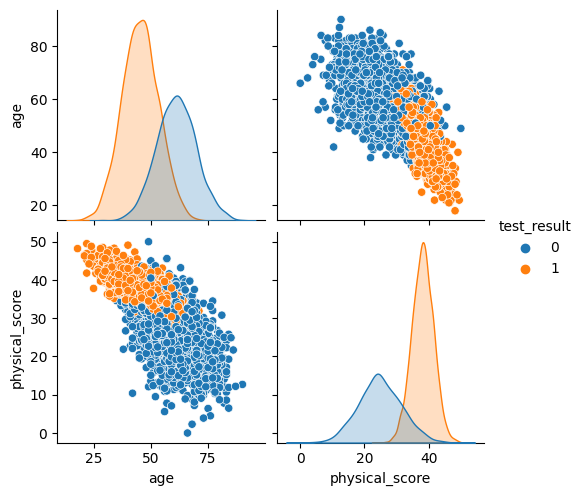

In [7]:
sns.pairplot(df , hue = 'test_result')

<AxesSubplot:>

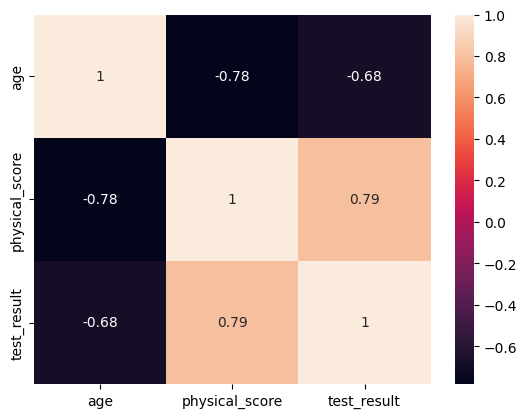

In [8]:
sns.heatmap(df.corr() , annot=True)

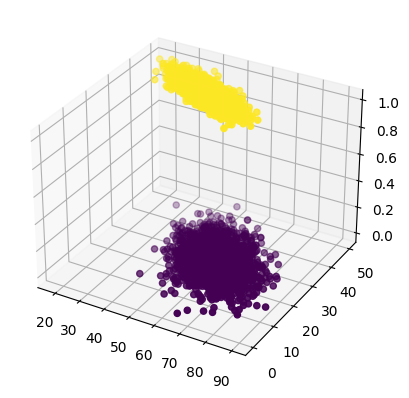

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter( df['age'] , df['physical_score'] , df['test_result'] ,  c = df['test_result'] )

## Logistic Regression

In [10]:
X = df.drop('test_result' , axis = 1)

In [11]:
y = df['test_result']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)

In [17]:
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(scaled_X_train , y_train)

LogisticRegression()

In [21]:
y_pred = log_model.predict(scaled_X_test)
#y_pred = log_model.predict_log_proba(scaled_X_test)
#y_pred = log_model.predict(scaled_X_test)

In [22]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [26]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [27]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

coeff of age = -0.94953524 i.e. as age increases test_result decreases

coeff of physical_score = 3.45991194 i.e. as physical_score increases test_result increases

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [30]:
accuracy_score(y_test , y_pred)

0.93

In [32]:
confusion_matrix(y_test , y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [33]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


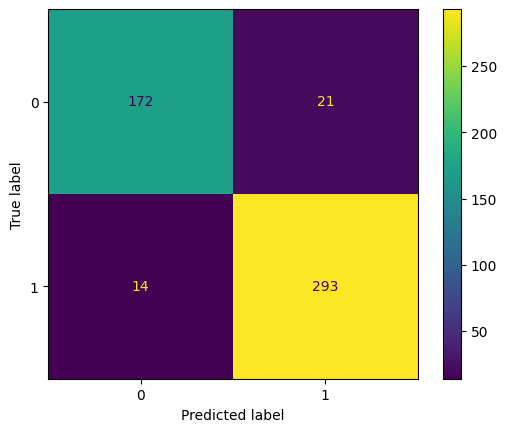

In [45]:
plot_confusion_matrix(log_model ,scaled_X_test, y_test)

if our model is performing well then their is a too much difference between TRUE POSITIVE & FALSE POSITIVE and TRUE NEGATIVE & FALSE NEGATIVE colour

In [37]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



accuracy = 0.93 , as we can see that our "precision" , "recall" , "f1-score" average's are very near to accuracy. Hence our mdel is perfectly balanced.

support = 193 means total no. of 0's = 193

support = 307 means total no. of 1's = 307

In [38]:
from sklearn.metrics import precision_score , recall_score

In [40]:
precision_score(y_test , y_pred)

0.9331210191082803

In [41]:
recall_score(y_test , y_pred)

0.9543973941368078

In [42]:
from sklearn.metrics import plot_precision_recall_curve , plot_roc_curve

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


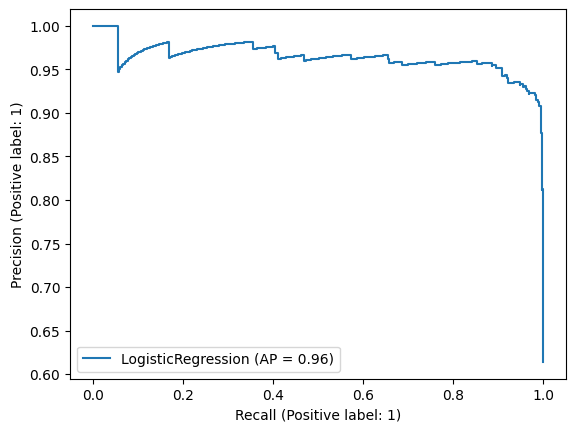

In [43]:
plot_precision_recall_curve(log_model , scaled_X_test , y_test)

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


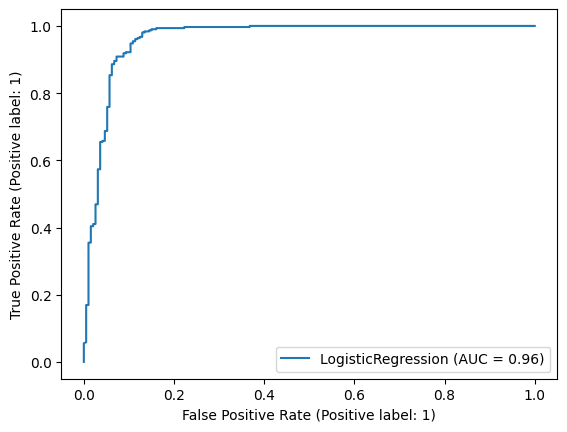

In [44]:
plot_roc_curve(log_model , scaled_X_test , y_test)

Here AUC = 0.96 , i.e. area under curve = 0.96 which is very good